In [104]:
import sys
import time
sys.path.append("../")

In [143]:
import pickle

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

from VehicleTracking import *
from FeatureExtractionPipeline import HogExtractor, SpatialBining, ColorHistogram, ColorSpaceConverter, \
    OptionalBranch, OptionalPCA, AcceptEmptyMinMaxScaler
     
%matplotlib inline

In [109]:
with open('../data/data.p', 'rb') as f:
    data = pickle.load(f)

In [110]:
X_val, y_val = data['val']

# Feature extraction result

In [118]:
with open('../models/gridsearch.p', 'rb') as f:
    clf_fe = pickle.load(f)

In [130]:
fe_acc = clf_fe.best_estimator_.score(X_val, y_val)
fe_acc

0.99227292608251927

In [131]:
pred = clf_fe.predict(X_val)
fe_auc = roc_auc_score(y_val, pred)
fe_auc

0.99212466088380724

In [114]:
clf_fe.best_params_

{'clf__C': 1,
 'features__chist__chist_csc__cspace': 'HLS',
 'features__chist__chist_optional__use': True,
 'features__chist__chist_pca__n_components': None,
 'features__chist__color_histogram__bins': 32,
 'features__hog__hog_csc__cspace': 'LAB',
 'features__hog__hog_extractor__cells_per_block': 2,
 'features__hog__hog_extractor__orient': 18,
 'features__hog__hog_extractor__pix_per_cell': 8,
 'features__hog__hog_pca__n_components': None,
 'features__sb__sb_csc__cspace': 'LAB',
 'features__sb__sb_optional__use': True,
 'features__sb__spatial_bining__bins': 32}

# C gridsearch

In [115]:
with open('../models/gridsearch_c.p', 'rb') as f:
    clf_c = pickle.load(f)

In [132]:
c_acc = clf_c.best_estimator_.score(X_val, y_val)
c_acc

0.99212713223501969

In [133]:
pred = clf_c.predict(X_val)
c_auc = roc_auc_score(y_val, pred)
c_auc

0.99193734645241205

In [119]:
clf_c.best_params_

{'clf__C': 0.01,
 'features__chist__chist_csc__cspace': 'HLS',
 'features__chist__chist_optional__use': True,
 'features__chist__chist_pca__n_components': None,
 'features__chist__color_histogram__bins': 32,
 'features__hog__hog_csc__cspace': 'LAB',
 'features__hog__hog_extractor__cells_per_block': 2,
 'features__hog__hog_extractor__orient': 18,
 'features__hog__hog_extractor__pix_per_cell': 8,
 'features__hog__hog_pca__n_components': None,
 'features__sb__sb_csc__cspace': 'LAB',
 'features__sb__sb_optional__use': True,
 'features__sb__spatial_bining__bins': 32}

# Retrain an complete train set

In [121]:
with open('../models/gridsearch_all_train.p', 'rb') as f:
    clf_all_train = pickle.load(f)

In [134]:
all_acc = clf_all_train.best_estimator_.score(X_val, y_val)

In [135]:
pred = clf_all_train.predict(X_val)
all_auc = roc_auc_score(y_val, pred)
all_auc

0.99449655808135518

# Retrain an complete train set + hard negative mining

In [21]:
with open('../models/gridsearch_hnm.p', 'rb') as f:
    clf_hnm = pickle.load(f)

In [137]:
hnm_acc = clf_hnm.best_estimator_.score(X_val, y_val)
hnm_acc

0.98950284298002622

In [138]:
pred = clf_hnm.predict(X_val)
hnm_auc = roc_auc_score(y_val, pred)
hnm_auc

0.98921441034319713

# Adj Dataset

In [124]:
with open('../models/svm_adj.p', 'rb') as f:
    clf_adj = pickle.load(f)

In [139]:
adj_acc = clf_adj.score(X_val, y_val)
adj_acc

0.99314768916751717

In [140]:
pred = clf_adj.predict(X_val)
adj_auc = roc_auc_score(y_val, pred)
adj_auc

0.99308341781431342

# Opencv hog

In [127]:
with open('../models/gridsearch_opencv_all.p', 'rb') as f:
    clf_opencv = pickle.load(f)

In [141]:
ocv_acc = clf_opencv.score(X_val, y_val)
ocv_acc

0.99266701685395553

In [142]:
pred = clf_opencv.predict(X_val)
ocv_auc = roc_auc_score(y_val, pred)
ocv_auc

0.96627250157720546

# Result

In [144]:
metrics = np.array([[fe_acc, c_acc, all_acc, hnm_acc, adj_acc, ocv_acc],
                    [fe_auc, c_auc, all_auc, hnm_auc, adj_auc, ocv_auc]]).T

In [157]:
result = pd.DataFrame.from_records(metrics,
                                   index=['feature_extraction', 'c_optimization',
                                          'all_data', 'hnm', 'adjusted data', 'opencv_hog'],
                                   columns=['accuracy', 'roc_auc'])

result.sort_values(['roc_auc'], ascending=False)

,accuracy,roc_auc
all_data,0.994606,0.994497
adjusted data,0.993148,0.993083
feature_extraction,0.992273,0.992125
c_optimization,0.992127,0.991937
hnm,0.989503,0.989214
opencv_hog,0.992667,0.966273


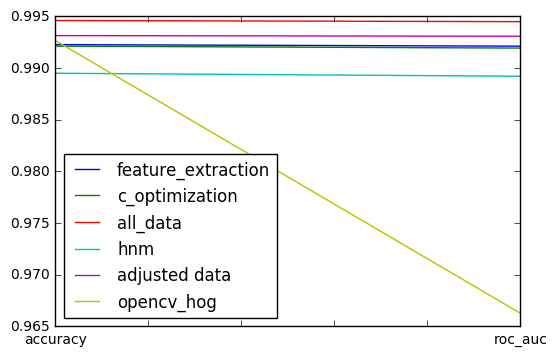

In [152]:
result.T.plot()